In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import seaborn.objects as so

In [3]:
directory_path = r'D:\origin-source-code-bill\models\KMeans\cluster\3'
directory_path_box = 'D:\origin-source-code-bill\models\Box'
pkl_files = [f for f in os.listdir(directory_path) if f.endswith('.pkl')]
print(pkl_files)

# plt.figure(figsize=(12, 8))
cluster_list = []
quartile_list = []


for pkl_file in pkl_files:
    file_path = os.path.join(directory_path, pkl_file)
    # print("file :::" , file_path)
    variable_name = os.path.splitext(pkl_file)[0]
    # print("Var ::" , variable_name)
    df_col_combined = pd.read_pickle(file_path)
    print( df_col_combined.columns)
    
    date = pd.to_timedelta(df_col_combined['total_time'])
    time_hours = date.dt.total_seconds() / 3600
    
    df_col_combined['hours'] = time_hours
    # print("DF ::" , df_col_combined.columns)
    
    df_last_col = df_col_combined.iloc[:,-4].unique()
    col_srt = df_col_combined.columns[-4]
    
    for cluster_value in df_last_col :
        print("I :::", cluster_value)
        cluster_data = df_col_combined[df_col_combined[col_srt] == cluster_value]
        print("================")
        # print(cluster_data)
        if cluster_value == 0 :
                cluter0_q1 = np.percentile(cluster_data['hours'], 25)
                cluter0_q3 = np.percentile(cluster_data['hours'], 75)
                cluter0_median = np.median(cluster_data['hours'])
        if cluster_value == 1 :
                cluter1_q1 = np.percentile(cluster_data['hours'], 25)
                cluter1_q3 = np.percentile(cluster_data['hours'], 75)
                cluter1_median = np.median(cluster_data['hours'])
        if cluster_value == 2 :
                cluter2_q1 = np.percentile(cluster_data['hours'], 25)
                cluter2_q3 = np.percentile(cluster_data['hours'], 75)
                cluter2_median = np.median(cluster_data['hours'])
    


    quartile_data = {
                      'col' : col_srt,
                      'cluter0_q1': [cluter0_q1],
                      'cluter0_median' : [cluter0_median],
                      'cluter0_q3': [cluter0_q3],
                      'cluter1_q1': [cluter1_q1],
                      'cluter1_median' : [cluter1_median],
                      'cluter1_q3': [cluter1_q3],
                      'cluter2_q1': [cluter2_q1],
                      'cluter2_median' : [cluter2_median],
                      'cluter2_q3': [cluter2_q3]
                      }
    cluster_list.append(quartile_data)
    results = pd.DataFrame(cluster_list)
    
    q0_75 = cluter0_q3 -cluter0_median
    print("Q0 75 :: " , q0_75)
    q0_25 = cluter0_median - cluter0_q1
    print("Q0 25 :: " , q0_25)
    q1_75 = cluter1_q3 -cluter1_median
    print("Q1 75 :: " , q1_75)
    q1_25 = cluter1_median - cluter1_q1
    print("Q1 25 :: " , q1_25)
    q2_75 = cluter2_q3 -cluter2_median
    print("Q2 75 :: " , q1_75)
    q2_25 = cluter2_median - cluter2_q1
    print("Q2 25 :: " , q2_25)
    
    
    quartile_data_2 = {
                        'col' : col_srt,
                        'cluter0_q1': [cluter0_q1],
                        'cluter0_median' : [cluter0_median],
                        'cluter0_q3': [cluter0_q3],
                        'Q0_25' : [q0_25],
                        'Q0_75' : [q0_75],
                        'cluter1_q1': [cluter1_q1],
                        'cluter1_median' : [cluter1_median],
                        'cluter1_q3': [cluter1_q3],
                        'Q1_25' : [q1_25],
                        'Q1_75' : [q1_75],
                        'cluter2_q1': [cluter2_q1],
                        'cluter2_median' : [cluter2_median],
                        'cluter2_q3': [cluter2_q3],
                        'Q2_25' : [q2_25],
                        'Q2_75' : [q2_75],
                      }
    quartile_list.append(quartile_data_2) 
    quartile_df = pd.DataFrame(quartile_list)

["['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end_Bloaters', 'end_Change Preventers', 'end_Couplers']_3.pkl", "['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end_Bloaters', 'end_Change Preventers', 'end_Object-Orientation Abusers']_3.pkl", "['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end_Bloaters', 'end_Change Preventers']_3.pkl", "['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end_Bloaters', 'end_Couplers', 'end_Object-Orientation Abusers']_3.pkl", "['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end_Bloaters', 'end_Couplers']_3.pkl", "['additions', 'begin_Bloaters', 'begin_Change Preventers', 'begin_Couplers', 'begin_Object-Orientation Abusers', 'end

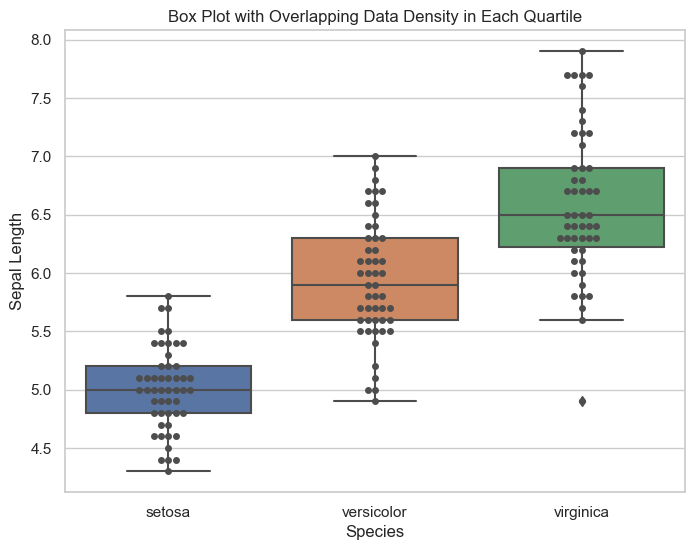

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = sns.load_dataset("iris")

# Create a box plot with quartiles
plt.figure(figsize=(8, 6))
sns.boxplot(x="species", y="sepal_length", data=data)

# Add overlaid swarm plot to show data density
sns.swarmplot(x="species", y="sepal_length", data=data, color="0.3")

# Set labels and title
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.title("Box Plot with Overlapping Data Density in Each Quartile")

# Show the plot
plt.show()


C:\Users\patcharaprapa_k\AppData\Local\Temp\ipykernel_16064\2881069352.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kde_quartiles[species] = [sns.kdeplot(data["sepal_length"][data["species"] == species], label=f'{species} Q1', bw=0.15).get_lines()[0].get_data(),


KeyError: 0

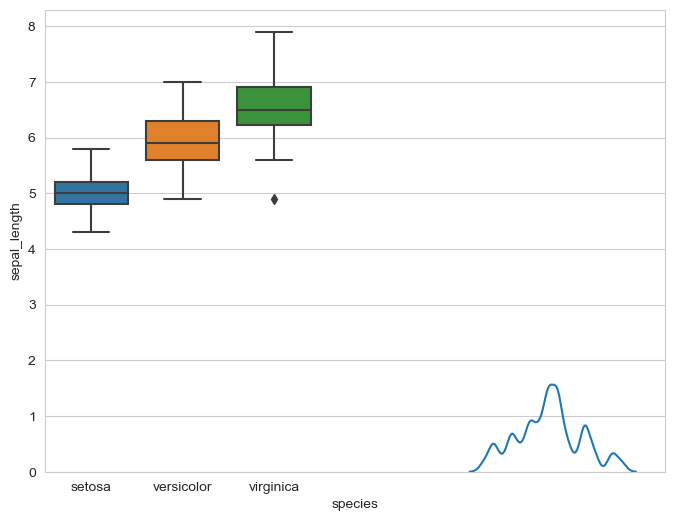

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = sns.load_dataset("iris")

# Create a box plot with quartiles
plt.figure(figsize=(8, 6))
sns.boxplot(x="species", y="sepal_length", data=data)

# Compute KDE for each quartile
quartiles = data.groupby("species")["sepal_length"].quantile([0.25, 0.5, 0.75]).unstack()
kde_quartiles = {}
for species, values in quartiles.iterrows():
    kde_quartiles[species] = [sns.kdeplot(data["sepal_length"][data["species"] == species], label=f'{species} Q1', bw=0.15).get_lines()[0].get_data(),
                              sns.kdeplot(data["sepal_length"][(data["species"] == species) & (data["sepal_length"] > values[0])], label=f'{species} Q2', bw=0.15).get_lines()[0].get_data(),
                              sns.kdeplot(data["sepal_length"][(data["species"] == species) & (data["sepal_length"] > values[1])], label=f'{species} Q3', bw=0.15).get_lines()[0].get_data()]

# Calculate overlapping area for each quartile
overlapping_areas = {}
for species, kde_values in kde_quartiles.items():
    q1_x, q1_y = kde_values[0]
    q2_x, q2_y = kde_values[1]
    q3_x, q3_y = kde_values[2]
    
    overlapping_area_q1 = np.trapz(np.minimum(q1_y, q2_y), q1_x)
    overlapping_area_q2 = np.trapz(np.minimum(q2_y, q3_y), q2_x)
    
    overlapping_areas[species] = {"Q1-Q2 Overlapping Area": overlapping_area_q1, "Q2-Q3 Overlapping Area": overlapping_area_q2}

# Print overlapping areas
for species, areas in overlapping_areas.items():
    print(f"Species: {species}")
    print(f"Q1-Q2 Overlapping Area: {areas['Q1-Q2 Overlapping Area']:.2f}")
    print(f"Q2-Q3 Overlapping Area: {areas['Q2-Q3 Overlapping Area']:.2f}")
    print("------")

# Set labels and title
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.title("Box Plot with Overlapping Data Density in Each Quartile")

# Show the plot
plt.show()
